In [6]:
import cv2
import numpy as np
import scipy.ndimage as ndi
from scipy import signal as sig
from google.colab import files
%matplotlib inline
import matplotlib.pyplot as plt

uploaded = files.upload()
image=cv2.imread("Image.png")
image2 = np.copy(image)
image1 = np.copy(image)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


Saving Image.png to Image (1).png


In [0]:
shi_tomasi = []
theta = 0
window_size = 6
offset = int(window_size/2)
h, w = gray_image.shape[:2]

In [0]:
def diff_x(gray_image):
  filter1 = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
  return sig.convolve2d(gray_image, filter1, mode = 'same')

def diff_y(gray_image):
  filter2 = np.array([[1, 2, 1], [1, 0, -1], [-1, -2, -1]])
  return sig.convolve2d(gray_image, filter2, mode = 'same')

I_x = diff_x(gray_image)
I_y = diff_y(gray_image)

In [0]:
Ixx = ndi.gaussian_filter(I_x**2, sigma = 1)
Ixy = ndi.gaussian_filter(I_x*I_y, sigma = 1)
Iyy = ndi.gaussian_filter(I_y**2, sigma = 1)

for y in range(offset, h-offset):
    for x in range(offset, w-offset):
        Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
        Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])
        
        m = np.matrix([[Sxx, Sxy], [Sxy, Syy]])
        l1, l2 = np.linalg.eigvals(m)

        r = min(l1,l2)
        if r>theta:
          image1.itemset((y, x, 0), 0)
          image1.itemset((y, x, 1), 0)
          image1.itemset((y, x, 2), 255)

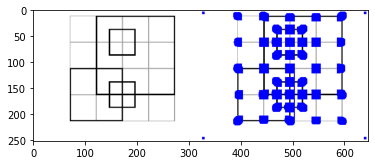

In [10]:

image3 = np.concatenate((image,image1),axis=1)
#Original image and image after corner detection
plt.imshow(image3)